In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
from tabulate import tabulate

In [2]:
features = ['Player', 'Player2', 'Time', 'Score_p1', 'Score_p2']
df = pd.read_csv('experiments.csv', names=features)
df

,Player,Player2,Time,Score_p1,Score_p2
0,simple_player,better_h_player,2,0.5,0.5
1,simple_player,improved_player,2,0.5,0.5
2,simple_player,improved_better_h_player,2,0.0,1.0
3,better_h_player,simple_player,2,0.5,0.5
4,better_h_player,improved_player,2,0.5,0.5
5,better_h_player,improved_better_h_player,2,0.5,0.5
6,improved_player,simple_player,2,0.5,0.5
7,improved_player,better_h_player,2,0.0,1.0
8,improved_player,improved_better_h_player,2,0.0,1.0
9,improved_better_h_player,simple_player,2,1.0,0.0


In [3]:
df_1 = df.groupby(['Player', 'Time'])[['Score_p1']].sum()
df_2 = df.groupby(['Player2', 'Time'])[['Score_p2']].sum()
n_df = pd.concat([df_1, df_2], axis=1)
n_df['Score'] = n_df['Score_p1'] + n_df['Score_p2']
n_df.drop(['Score_p1', 'Score_p2'], axis=1, inplace=True)
n_df

Score
Player                   Time       
better_h_player          2       3.5
                         10      3.0
                         50      4.5
improved_better_h_player 2       4.5
                         10      3.5
                         50      3.5
improved_player          2       2.0
                         10      2.0
                         50      2.0
simple_player            2       2.0
                         10      3.5
                         50      2.0

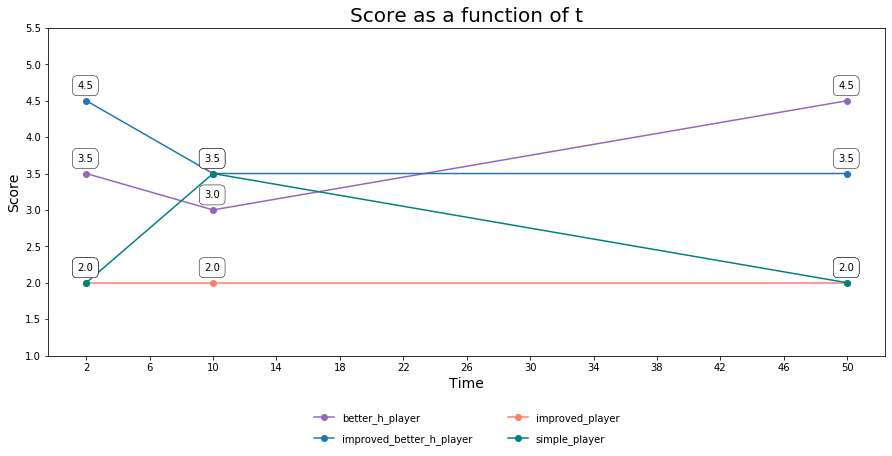

In [4]:
d_f = n_df.unstack(level=0)
d_f.columns = d_f.columns.get_level_values(1)

default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [default_colors[4], default_colors[0], 'salmon', 'teal']

d_f.plot(legend=True, figsize=(15,7), marker='o', color = colors)
plt.title('Score as a function of t', fontsize=20)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Score', fontsize=14)
#plt.xticks(d_f.index)
plt.xticks(range(2,51,4))
plt.yticks(np.arange(1.0,6.0,0.5))

for i in d_f.columns:
    for j in d_f.index:
        plt.annotate(d_f[i][j], xy=(j, d_f[i][j]),
                     xytext=(7, 10), textcoords='offset points', ha='right', va='bottom', 
                     bbox=dict(boxstyle='Round,pad=0.5', fc='white', ec="black", lw=0.5))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, frameon=False, labelspacing=1, columnspacing=3.5)
plt.subplots_adjust(bottom=0.23)
plt.savefig('graph.png')
plt.show()

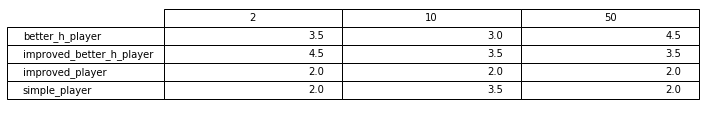

In [5]:
fig, ax = plt.subplots(figsize=(12, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, d_f.transpose(), loc='upper right')  # where df is your data frame
#tabla.auto_set_font_size(False) # Activate set fontsize manually
#tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(0.8, 1.5) # change size table
plt.savefig('table.png', transparent=True)